In [18]:
import os
import zipfile

import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount("./drive",force_remount=True)

Mounted at ./drive


In [3]:
DATA_DIR = "./drive/MyDrive/flowers"

## IMAGE AUGMENTATION

In [4]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [5]:
generator = datagen.flow_from_directory(
        DATA_DIR,
        target_size=(120, 120),
        batch_size=64)

Found 4337 images belonging to 5 classes.


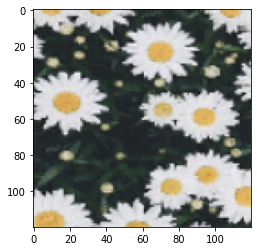

In [6]:
img,label = generator.next()
plt.imshow(img[0])

## Model

### Creating the Model

In [21]:
class Model:
  model = None
  def __init__(self):pass
  def create_model(self):

    # Sequential Model
    self.model = tf.keras.models.Sequential()

    # Conv,MaxPool-1
    self.model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)))
    self.model.add(layers.MaxPooling2D((2, 2)))
    
    
    # Flatten Layer
    self.model.add(layers.Flatten())
    self.model.add(layers.Dense(64,activation='relu'))
    self.model.add(layers.Dense(16, activation='relu'))

    # Dense (Output Layer)
    self.model.add(layers.Dense(5,activation='softmax'))

    # Compile Model
    self.model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])


  def save_model(self):
    self.model.save("model.h5")

  def model_summary(self):
    self.model.summary()

  def load_model(self,model_dir):
    self.model = tf.keras.models.load_model(model_dir)


### Training the Model

In [22]:
model_inst = Model()
model_inst.create_model()

history = model_inst.model.fit(generator, epochs=3)


Epoch 1/3
68/68 [==============================] - 102s 1s/step - loss: 2.0750 - accuracy: 0.3970
Epoch 2/3
68/68 [==============================] - 86s 1s/step - loss: 1.1608 - accuracy: 0.5209
Epoch 3/3
68/68 [==============================] - 86s 1s/step - loss: 1.0721 - accuracy: 0.5585


### Saving Model

In [9]:
model_inst.save_model()

### Loading Model

In [10]:
model_inst.load_model("model.h5")

### Testing the Model

Predicted: 0


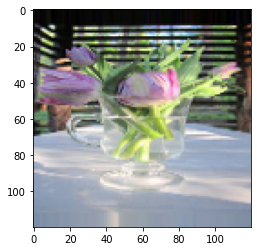

In [24]:
img = generator.next()[0]
y_pred = model_inst.model.predict([img])
predicted = np.argmax(y_pred,axis=1)[0]
plt.imshow(img[0])
print(f"Predicted: {predicted}")